La metrica  puede ser generalizada como sigue,

$ d = \left [ \sum_{i = 1}^{D}(x_{i}-x_{i}^{,})^{p} \right ] ^{\frac{1}{p}} $

Determine los valores mínimos de $\theta_{0}$  y  $\theta_{1}$ para los siguientes casos:
1.  Emplea la metrica ecuclidiana con p = 2 compare su resultado con los valores empleando la libreria   sklearn:Linear Regresion.
2. Emple p = 1, p = 3. ¿Como varian los resultaodos en este caso?
3. Construya las curvas de aprendizaje para función del número de datos para las situaciones descritas, ¿qué peude concluir?

## implementación de gradiente descendente

1. Emplea la metrica ecuclidiana con p = 2 compare su resultado con los valores empleando la libreria sklearn:Linear Regresion.

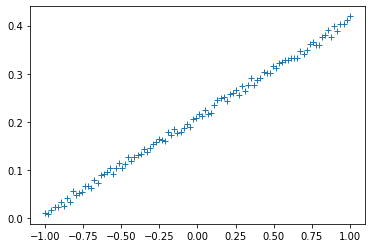

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from scipy.optimize  import curve_fit

#data = pd.read_csv('data.csv',header = None)
#DF_data = pd.DataFrame(data, columns= ['X','Y'])

x = np.linspace(-1, 1, 100)
y = 0.2 + 0.2*x + 0.02*np.random.random(100)

# ploteo los datos

fig, ax = plt.subplots()
ax.plot(x,y,'+')


In [9]:

#  Gradiente descendente

def Sumatoria_x0(xx,yy,t_0,t_1,m):
    s = 0
    for i in range(0,len(xx)):
        s = s + t_1*x[i] + t_0 - y[i]
        #s += s 
    return s

    
def Sumatoria_x1(xx,yy,t_0,t_1,m):
    s = 0
    for i in range(0,len(xx)):
        s = s + (t_1*x[i] + t_0 - y[i])*x[i]
        #s += s 
    return s



In [10]:
def fuu(tetha_0,tetha_1, alfa ):
    
    #alfa = 0.0001 
    tetha_0 = 10
    tetha_1 = 10
    m = 10
    
    MAE = []
    MSE = []
    MAPE = []

    for n in range(0,100):
        
        
        tetha_0 = tetha_0 - alfa*Sumatoria_x0(x,y,tetha_0,tetha_1,len(x))/m
        tetha_1 = tetha_1 - alfa*Sumatoria_x1(x,y,tetha_0,tetha_1,len(y))/m
        
        MSE.append(sum(tetha_1*x + tetha_0 - y))
        MAE.append(abs(sum(tetha_1*x + tetha_0 - y)))
        MAPE.append(abs(sum((tetha_1*x + tetha_0 - y) /x)))
             
    return tetha_1,tetha_0 , MSE, MAE ,MAPE

# Llamo la funcion fuu
tetha_1, tetha_0, MSE, MAE ,MAPE = fuu(10,10,alfa = 0.1)
 
print("tethe_0 = %.2f / tetha_1 = %.2f"%(tetha_0,tetha_1))

tethe_0 = 0.21 / tetha_1 = 0.20


In [13]:
print("Obtenidos mediante Curve-fit tetha_1= %.2f / tetha_0 = %.2f"%(aa,bb))

Obtenidos mediante Curve-fit tetha_1= 0.20 / tetha_0 = 0.21


2. Emple p = 1, p = 3. ¿Como varian los resultaodos en este caso?

In [12]:
#  Gradiente descendente

def Sumatoria_x0(xx,yy,t_0,t_1,m):
    s = 0
    for i in range(0,len(xx)):
        s = s + t_1*x[i] + t_0 - y[i]
        #s += s 
    return s

    
def Sumatoria_x1(xx,yy,t_0,t_1,m):
    s = 0
    for i in range(0,len(xx)):
        s = s + (t_1*x[i] + t_0 - y[i])*x[i]
        #s += s 
    return s



In [21]:
def Gradient_descent(tetha_0,tetha_1, alfa ):
    
    #alfa = 0.0001 
    tetha_0 = 10
    tetha_1 = 10
    m = 10
    
    for n in range(0,100):
        
        
        tetha_0 = tetha_0 - alfa*Sumatoria_x0(x,y,tetha_0,tetha_1,len(x))/m
        tetha_1 = tetha_1 - alfa*Sumatoria_x1(x,y,tetha_0,tetha_1,len(y))/m
        
       
             
    return tetha_1,tetha_0 

# Llamo la funcion fuu
tetha_1, tetha_0 = Gradient_descent(10,10,alfa = 0.1) 

print('Los valores encontrados para theta_0 y theta_1 son:')
print("tethe_0 = %.2f / tetha_1 = %.2f"%(tetha_0,tetha_1))

Los valores encontrados para theta_0 y theta_1 son:
tethe_0 = 0.21 / tetha_1 = 0.20


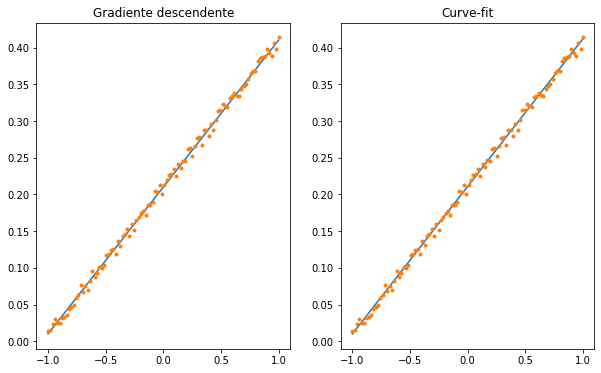

In [22]:
# plot 1 the final fitting line to the data and compare it with the scipy.optimize (lm) build-in function
fig, ax = plt.subplots(1,2,figsize=(10,6)) 


xx = np.linspace(0,70,len(x)+33)

tetha_0 = 0.21
tetha_1 = 0.20


def final_fitting(xx):
    yy = []
    for i in xx:
        y = tetha_1*i + tetha_0
        yy.append(y)
    return yy

 

ax[0].plot(x,final_fitting(x))
ax[0].set_title("Gradiente descendente")
ax[0].plot(x,y,".")



###################################
###Scipy.optimize
#################################



def cuadratic(x,a,b):
    
    return  a*x + b

[aa,bb] , cov = curve_fit(cuadratic,x,y)

#print()

ax[1].plot(x,cuadratic(x,aa,bb),label='Curve-fit') 
ax[1].set_title("Curve-fit")
ax[1].plot(x,y,".")


2. **Emplee p = 1, p = 3. ¿Como varian los resultaodos en este caso?**

No importa que valores tome p ya que al deriva  la función j p se cancela.

3. **Construya las curvas de aprendizaje para función del número de datos para las situaciones descritas, ¿qué peude concluir?**

In [ ]:
#Metodo para generar k divisiones en forma de diccionario.
from sklearn.metrics import r2_score 

def get_K_divs(X_t, y, K, test_size_):
    divs = []
    for i in range(K):
        X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size = test_size_,  
                                                    random_state=None)
        divs.append({"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test})
    return divs


#Mi propia funcion de curva de aprendizaje
#usamos r2 score

def score(y, y_predicted):
    R_square = r2_score(y, y_predicted) 
    return R_square

def learning_curve(X_t, y, K, test_size_, alpha, p, theta_0, theta_1):
    #obtenemos las divisiones
    divs = get_K_divs(X_t, y, K, test_size_)
    #print(divs)
    #para almanecenar la media y std
    training_score = []
    training_score_std = []
    test_score = []
    test_score_std = []
    test_score = []
    #hacemos los splits
    #como minimo deben haber dos pares, y como máximo, el tamaño de todo el arreglo
    for split in range(2, X_t.shape[0]):
        #valores para promediar
        sub_training_score = np.array([])
        sub_test_score = np.array([])
        for div in divs:             
            #hacemos una selección, el split representa el indice hasta donde
            X_train = div["X_train"][0:split]
            y_train = div["y_train"][0:split]            
            X_test = div["X_test"]
            y_test = div["y_test"]
            #en algunos casos, hay valores de una sola clase, lanza error
            if(len(np.unique(y_train)) == 1):
                continue
            theta_0_, theta_1_ = gradient_iteration(X_train, y_train, theta_0, theta_1, alpha, p, len(X_train))
            y_X = lambda x: theta_0_ + theta_1_*x 
            #calculamos los score
            sub_training_score = np.append(sub_training_score, score(y_train, y_X(X_train)))
            sub_test_score = np.append(sub_test_score, score(y_test, y_X(X_test)))
        training_score.append(np.mean(sub_training_score))
        training_score_std.append(np.std(sub_training_score))
        
        test_score.append(np.mean(sub_test_score))
        test_score_std.append(np.std(sub_test_score))
    train_size = np.arange(2, X_t.shape[0], 1)
    return train_size, np.array(training_score), np.array(training_score_std), np.array(test_score), np.array(test_score_std)
    
    
    #for train_index, test_index in cv.split(X_t):
     #   print(train_index, test_index)


In [23]:
q = X_t[0:10]

NameError: name 'X_t' is not defined